# Index

#### 1. K-mean clustering
#### 2. KNN and performance metrics
#### 3. Random forest
#### 4. Preceptron model
#### 5. Support vector machine
























# 1. K-mean clustering

# Task 1

We require to declare the k value (number of clusters) before running the algorithm. It’s not able of defining the optimum number of clusters. K-means partitions the data set into the number of clusters determined by us beforehand. Finding the optimum number of clusters is also a challenging task for us. We can’t just glance at the data set and understand out how many partitions we should have. The best solution for this problem is to use the elbow method.

#  Task 2

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

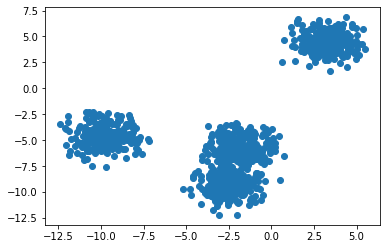

In [2]:
X = np.loadtxt("data_Kclusters(1).txt" )
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In the first look at the data, it seems that data has three clusters.Let's implment the k mean clustering with k = 3.

In [3]:
# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

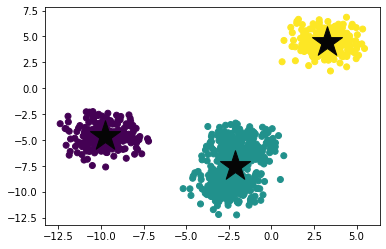

In [4]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(C[:, 0], C[:, 1],  marker='*', c='#050505', s=1000)
plt.show() 

Now we will find the optimum value of k. For this, i implemented k mean cluesting on range of 2 to 10, and find the WCSS to find the optimum value of k.

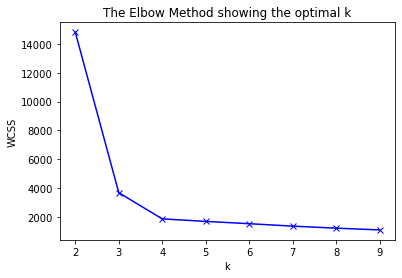

In [5]:
WCSS = []
K = range(2,10)
for this_k in K:
    kmeanModel = KMeans(n_clusters = this_k)
    kmeanModel.fit(X)
    WCSS.append(kmeanModel.inertia_)
 
# Plot the elbow
plt.figure()
plt.plot(K, WCSS, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show() 

At first, we thought we have three clusters in data but above graph suggest that the optimum value of k is 4. let' implement the k mean clustering with k=4 and identify the forth missing cluster. 

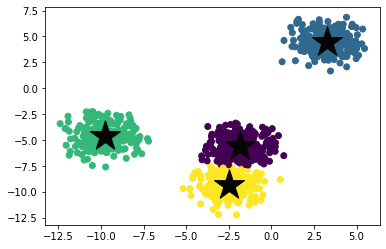

In [6]:
# Initializing KMeans
K_elbow = 4 # replace this value by what you found in elbow method
kmeans = KMeans(n_clusters = K_elbow)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels)
#plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(C[:, 0], C[:, 1],  marker='*', c='#050505', s=1000)
plt.show() 

As we can see, k mean clustering without proper test can always be miss leading. So we should always check for the optimum value of k before before implementation of k mean clustering.

# 2. K-NN and Performance Metrics

# Task 1

I craeted the formulas for Sensitivity, Specificity, Precision, and accuracy.

In [38]:
TP = 33
FP = 10
FN = 17
TN = 40

print('\nPerformance Metrics')
#Sensitivity, hit rate, recall, or true positive rate
print('TPR = Sensitivity = recal = '+'{:.2f}'.format(TP/(TP+FN)))
# Specificity or true negative rate
print('TNR = Specificity = '+'{:.2f}'.format(TN/(TN+FP)))
# Precision or positive predictive value
print('PPV = Precision = '+'{:.2f}'.format(TP/(TP+FP)))
# Overall accuracy
print('ACC = Accuracy = '+'{:.2f}'.format((TP+TN)/(TP+FP+FN+TN)))


Performance Metrics
TPR = Sensitivity = recal = 0.66
TNR = Specificity = 0.80
PPV = Precision = 0.77
ACC = Accuracy = 0.73


# Task 2 (a)

I implemented the knn for k= 3 and k = 7 and compare the results. Let's implement for the k = 3.

In [40]:
import numpy as np
DATA = np.loadtxt("data_Seminar-Supervised-Classification-K-NN-Performance-Metrics.txt")

X = DATA[:, 0:2]
y = DATA[:, 2]

from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(testy, model.predict(testX))

TP = cnf_matrix[0][0]
FP = cnf_matrix[0][1]
FN = cnf_matrix[1][0]
TN = cnf_matrix[1][1]
print('TP = ', TP)
print('FP = ', FP)
print('FN = ', FN)
print('TN = ', TN)

print('\nPerformance Metrics')
#Sensitivity, hit rate, recall, or true positive rate
print('TPR = Sensitivity = recal = '+'{:.2f}'.format(TP/(TP+FN)))
# Specificity or true negative rate
print('TNR = Specificity = '+'{:.2f}'.format(TN/(TN+FP)))
# Precision or positive predictive value
print('PPV = Precision = '+'{:.2f}'.format(TP/(TP+FP)))
# Overall accuracy
print('ACC = Accuracy = '+'{:.2f}'.format((TP+TN)/(TP+FP+FN+TN)))


TP =  86
FP =  22
FN =  6
TN =  86

Performance Metrics
TPR = Sensitivity = recal = 0.93
TNR = Specificity = 0.80
PPV = Precision = 0.80
ACC = Accuracy = 0.86


with k = 3, I am able to get 86% accuracy, and all other metrics are also 80% +.


Area Under The Curve: AUC = 0.904



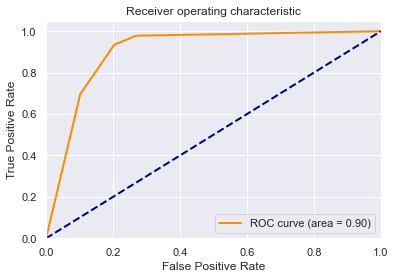

In [41]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
## predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# calculate AUC
auc = roc_auc_score(testy, probs)
print('\nArea Under The Curve: AUC = %.3f\n' % auc)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Task 2 (b)

Now, I implemented the knn for k = 7, and compare the results with the above results.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(trainX, trainy)

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(testy, model.predict(testX))

TP = cnf_matrix[0][0]
FP = cnf_matrix[0][1]
FN = cnf_matrix[1][0]
TN = cnf_matrix[1][1]
print('TP = ', TP)
print('FP = ', FP)
print('FN = ', FN)
print('TN = ', TN)

print('\nPerformance Metrics')
#Sensitivity, hit rate, recall, or true positive rate
print('TPR = Sensitivity = recal = '+'{:.2f}'.format(TP/(TP+FN)))
# Specificity or true negative rate
print('TNR = Specificity = '+'{:.2f}'.format(TN/(TN+FP)))
# Precision or positive predictive value
print('PPV = Precision = '+'{:.2f}'.format(TP/(TP+FP)))
# Overall accuracy
print('ACC = Accuracy = '+'{:.2f}'.format((TP+TN)/(TP+FP+FN+TN)))

TP =  88
FP =  20
FN =  4
TN =  88

Performance Metrics
TPR = Sensitivity = recal = 0.96
TNR = Specificity = 0.81
PPV = Precision = 0.81
ACC = Accuracy = 0.88


In [ ]:
# from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
## predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# calculate AUC
auc = roc_auc_score(testy, probs)
print('\nArea Under The Curve: AUC = %.3f\n' % auc)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion

K = 7 is the better value beacuse we have better senstivity, Specificity , accuracy, and AUC.

# Task 3

f1 score is weighted average of the precision and recall values, where an F1 score reaches its best value at 1 and worst value at 0.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)
from sklearn.metrics import f1_score
print('f1_score = '+'{:.2f}'.format(f1_score(testy, model.predict(testX), pos_label=1)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(trainX, trainy)
from sklearn.metrics import f1_score
print('f1_score = '+'{:.2f}'.format(f1_score(testy, model.predict(testX), pos_label=1)))

f1_score also suggest the k = 7 as well.

# 3. Random Forest

# Task 1

In [50]:
# Load the library with the iris dataset
from sklearn.datasets import load_iris
# Load pandas
import pandas as pd
# Load numpy
import numpy as np

As iris is available in sklearn library, I dont need to import a file from outside.

In [44]:
# Create an object called iris with the iris data
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


To get predection, I added a new column with the species names.

In [45]:

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Following codes will genrate a new variable with 75% of True and 25% of false values.

In [46]:
np.random.seed(0)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [49]:
# Create a list of the feature column's names
features = df.columns[:4]

# View features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [52]:
y = pd.factorize(train['species'])[0]

I created a random forest Classifier. I specified the two number of features using max_features.
I used training set to train the models. and got the predection on testing set.

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features=2, random_state=0)

clf.fit(train[features], y)

RandomForestClassifier(max_features=2, random_state=0)

In [55]:
y_pred = clf.predict(test[features])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [56]:
preds = iris.target_names[clf.predict(test[features])]
# Create confusion matrix
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


By using two features, Our model got two wrong predections, where model predected the virginica but the actual value was versicolor. Now I did the same thing with three features.

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier. By convention, clf means 'Classifier'
# We can specify the number of features using max_features 
clf = RandomForestClassifier(max_features=3, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)
y_pred = clf.predict(test[features])
y_pred
preds = iris.target_names[clf.predict(test[features])]
# Create confusion matrix
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,6,1
virginica,0,0,12


By using three features, Our model got oneong predections, where model predected the virginica but the actual value was versicolor. Now I did the same thing with four features.

In [58]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier. By convention, clf means 'Classifier'
# We can specify the number of features using max_features 
clf = RandomForestClassifier(max_features=4, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)
y_pred = clf.predict(test[features])
y_pred
preds = iris.target_names[clf.predict(test[features])]
# Create confusion matrix
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


By using four features, Our model again got two wrong predections, where model predected the virginica but the actual value was versicolor. So overall I got the best result with three features, four is the max number of features, we can't run the model with five features.

# Task 2

Following formulas helps us to find the value of information gain.

$Entropy(S) = -p_{+}log_2 p_+ - p_- log_2 p_-$

$Information gain = Entropy(S) - \sum_{v = values(A)} (|Sv|/|S|) Entropy(Sv)$

By using the above formulas, information gain of A1 is 0.27 and information gain of A2 is 0.12, thus A1 is the better split.

# 4. Preceptron model

# Task 1

In [99]:
# Generate dataset
import numpy as np
DATA = np.loadtxt("data_Perceptron(1).txt")
X=DATA[:,0:2]
Y = DATA[:,2]

Before implementing the hyperline, we should see the data set first.

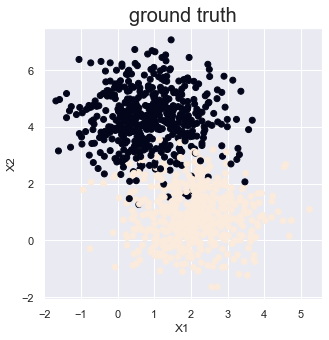

In [101]:
import random
random.seed( 10 )
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], c=Y)
ax.set_title('ground truth', fontsize=20)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


# Add a bias to the X vector
X_bias = np.ones([X.shape[0], 3])
X_bias[:, 1:3] = X
# Initialize weight vector with zeros
w = np.zeros([3, 1])

Let's create the activation fucntion and weights for the preceptron algorithem.

In [102]:
# Define the activation function  that returns either 1 or 0
def activation(x):
    return 1 if x >= 1 else 0

# A function to calculate the unit vector of our weights vector
def calc_unit_vector(x):
    return x.transpose() / np.sqrt(x.transpose().dot(x))

# A function that returns values that lay on the hyperplane
def calc_hyperplane(X, w):
    return np.ravel([-(w[0] + x * w[1]) / w[2] for x in X])

In [103]:
for _ in range(10):
    for i in range(X_bias.shape[0]):
        y = activation(w.transpose().dot(X_bias[i, :]))
        # Update weights
        w = w + ((Y[i] - y) * X_bias[i, :]).reshape(w.shape[0], 1)

print('w0 = ', w[0])
print('w1 = ', w[1])
print('w2 = ', w[2])
        

# Calculate the class of the data points with the weight vector
result = [w.transpose().dot(x) for x in X_bias]
result_class = [activation(w.transpose().dot(x)) for x in X_bias]

# Calculate unit vector
w = calc_unit_vector(w).transpose()

w0 =  [26.]
w1 =  [4.97]
w2 =  [-15.22]


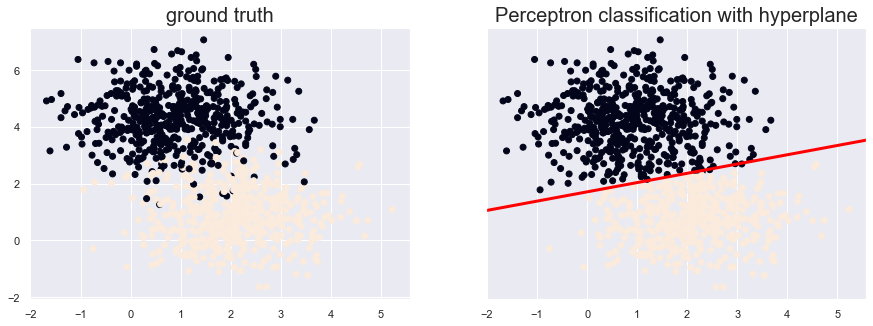

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(X[:, 0], X[:, 1], c=Y)
ax[0].set_title('ground truth', fontsize=20)

ax[1].scatter(X[:, 0], X[:, 1], c=result_class)
ax[1].plot([-20, 20], calc_hyperplane([-20, 20], w), lw=3, c='red')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_yticks([])
ax[1].set_title('Perceptron classification with hyperplane', fontsize=20)
plt.show()

In [105]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y, result_class, labels=[0, 1])
cnf_matrix

array([[490,  10],
       [ 48, 452]], dtype=int64)

In [106]:

TP = cnf_matrix[0][0]
FP = cnf_matrix[0][1]
FN = cnf_matrix[1][0]
TN = cnf_matrix[1][1]
print('TP = ', TP)
print('FP = ', FP)
print('FN = ', FN)
print('TN = ', TN)

print('\nPerformance Metrics')
#Sensitivity, hit rate, recall, or true positive rate
print('TPR = Sensitivity = recal = '+'{:.2f}'.format(TP/(TP+FN)))
# Specificity or true negative rate
print('TNR = Specificity = '+'{:.2f}'.format(TN/(TN+FP)))
# Precision or positive predictive value
print('PPV = Precision = '+'{:.2f}'.format(TP/(TP+FP)))
# Overall accuracy
print('ACC = Accuracy = '+'{:.2f}'.format((TP+TN)/(TP+FP+FN+TN)))


TP =  490
FP =  10
FN =  48
TN =  452

Performance Metrics
TPR = Sensitivity = recal = 0.91
TNR = Specificity = 0.98
PPV = Precision = 0.98
ACC = Accuracy = 0.94


In [107]:
(48+10)/1000

0.058

Data is not fully linearly seprable and 5% of the of points are wrongly classified using linear
hyperplane.

# 5. Support vector machine

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [109]:
# Generate dataset
import numpy as np
DATA = np.loadtxt("data_SVM(1).txt")
X=DATA[:,0:2]
y = DATA[:,2]

Let's implement the support vector machine with c = 0.01.

In [110]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=0.01)
model.fit(X, y)

SVC(C=0.01, kernel='linear')

In [111]:
def plot_svc_decision_function(model, ax=None, plot_support=False):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

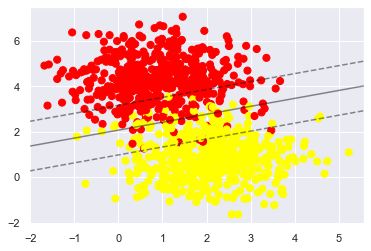

In [112]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [113]:
y_pred = model.predict(X)

In [114]:
from sklearn import metrics
metrics.confusion_matrix(Y, y_pred, labels=[0, 1])

array([[481,  19],
       [ 26, 474]], dtype=int64)

Now I implement the support vector machine with c = 0.1

In [115]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=0.1)
model.fit(X, y)

SVC(C=0.1, kernel='linear')

In [116]:
y_pred = model.predict(X)

In [117]:
metrics.confusion_matrix(Y, y_pred, labels=[0, 1])

array([[481,  19],
       [ 24, 476]], dtype=int64)

Let's implement the support vector machine with c = 1

In [118]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [119]:
y_pred = model.predict(X)

In [120]:
metrics.confusion_matrix(Y, y_pred, labels=[0, 1])

array([[481,  19],
       [ 23, 477]], dtype=int64)

In [122]:
frst = (19+26)/1000
frst

0.045

In [123]:
scnd = (19+24)/1000
scnd

0.043

In [124]:
thrd = (19+23)/1000
thrd

0.042

With the increase in c perameter, we see a significant decrease in miss classified percentage.

# Comparision

Support vector machines gives us better accuracy than the preceptron model.